In [1]:
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import *
from scipy.stats import *
from scipy.optimize import leastsq
import numpy.random as random
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

# Strength prediction model without knot ratio
To compare the performance of this model with the one including knot ratio

In [2]:
data = read_csv('Data_MOBETa.csv',sep=';')
species = ['Billinga','Tali','Eveuss','Okan','Massaranduba','Greenheart']

random.seed(10)

for i in species: 
    nmetKR = len(data.KR[(data.KR>0)&(data.Species==i)])
    a = data.KR[(data.KR==0)&(data.Species==i)]
    remove_n = len(a) - nmetKR
    drop_indices = random.choice(data.index[(data.KR==0)&(data.Species==i)], remove_n, replace=False)
    data = data.drop(drop_indices)

def faKRmod(rho,KR,MOEaKR,D1,D2,D3,D4,D5):
    f = (( rho*MOEaKR*(1-D3*KR) ) / ( D1*rho*(1-D4*KR) + D2*MOEaKR )) + D5
    return f

def famod(rho,MOEa,D1,D2,D3):
    f = ( (rho*MOEa) / (D1*rho + D2*MOEa) ) + D3
    return f

for i in species: 
    nmetKR = len(data.KR[(data.KR>0)&(data.Species==i)])
    a = data.KR[(data.KR==0)&(data.Species==i)]
    remove_n = len(a) - nmetKR
    drop_indices = random.choice(data.index[(data.KR==0)&(data.Species==i)], remove_n, replace=False)
    data = data.drop(drop_indices)

In [3]:
D1 = 144.8
D2 = 3.63
D3 = -22.4
print (len(data.rho12))

288


D1 =  202.66049992825168 D2 =  -0.554781649527184 D3 =  -28.850725947997333
r^2 =  0.6579740441079952


D:\Programs\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


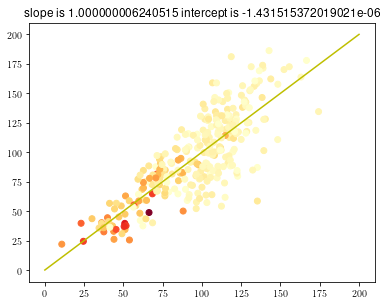

In [4]:
## D's directly determined from non-lineair regression of model on measured values

def residuals(D,f,rho,MOE):
    D1,D2,D3 = D
    err = f - (( (rho*MOE) / (D1*rho + D2*MOE) ) + D3)
    return err

b = data.alpha
x1 = data.rho12
x2 = data.Edyn12
y = data.fm12

D0 = [D1,D2,D3]
Dlsq = leastsq(residuals,D0,args=(y,x1,x2))
D1,D2,D3 = Dlsq[0]
print ("D1 = ",D1, "D2 = ", D2, "D3 = ", D3)

x = famod(x1,x2,D1,D2,D3)
slope, intercept, r_value, p_value, std_err = linregress(x,y)
print ("r^2 = ",r_value**2)
reeks = np.linspace(0,200,100)

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_axes([0.05,0.05,0.4,0.9])
ax1.set_title("slope is "+str(slope)+"  intercept is "+str(intercept))
s1 = ax1.scatter(x,y,c=b,cmap='YlOrRd',edgecolor='face')
s2 = ax1.plot(reeks,reeks*slope+intercept,'y')

plt.show()

1.8712265179812186e-17 -1.7482283406010228e-14


D:\Programs\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


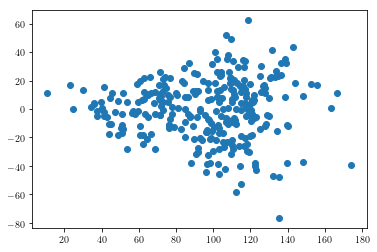

In [5]:
error = y - (slope*x+intercept)
slopeerr,intercepterr,rvalueerr,perr,stderrerr = linregress(x,error)
print (slopeerr,intercepterr)
plt.scatter(x,error)
savetxt('errfamod',error)

Text(-20,-80,'$\\,y\\,=\\,0$')

D:\Programs\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


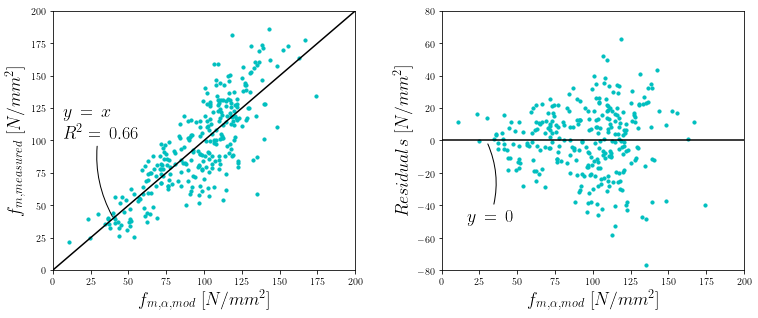

In [6]:
# Nice graphs for report. Lower R^2 (0.8 ~ 0.66) than model with KR so difference!
reeks = np.linspace(0,200,100)

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_axes([0.05,0.05,0.35,0.9])
ax1.set_xlabel(r'$f_{m,\alpha,mod}$  $[N/mm^2]$')
ax1.set_ylabel(r'$f_{m,measured}$  $[N/mm^2]$')
ax1.xaxis.label.set_fontsize(18)
ax1.yaxis.label.set_fontsize(18)
ax1.set_xlim(0,200)
ax1.set_ylim(0,200)
s1 = ax1.scatter(x,y,color='c',edgecolor='face',s=10)
s2 = ax1.plot(reeks,reeks*slope+intercept,'k')
annotation_string = r"""$\,\,y\,=\,x$
$R^2=\,0.66$"""
plt.annotate(annotation_string,
             xy=(40,40), xycoords='data',
             xytext=(-50,80), textcoords='offset points', fontsize=18,
             arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=.2"))

ax2 = fig.add_axes([0.5,0.05,0.35,0.9])
ax2.set_xlabel(r'$f_{m,\alpha,mod}$  $[N/mm^2]$')
ax2.xaxis.label.set_fontsize(18)
ax2.set_ylabel(r'$Residuals$  $[N/mm^2]$')
ax2.yaxis.label.set_fontsize(18)
ax2.set_xlim(0,200)
ax2.set_ylim(-80,80)
s3 = ax2.scatter(x,error,color='c',edgecolor='face',s=10)
s4 = ax2.plot(reeks,reeks*slopeerr+intercepterr,'k')
annotation_string = r"""$\,y\,=\,0$"""
plt.annotate(annotation_string,
             xy=(30,-1), xycoords='data',
             xytext=(-20,-80), textcoords='offset points', fontsize=18,
             arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=.2"))
# plt.savefig('famodDregress'+'.eps', bbox_inches='tight')

D1 =  1058.2999971585882 D2 =  -23.025497480459773 D3 =  34.77978032146685
r^2 =  0.3550155224327135


D:\Programs\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


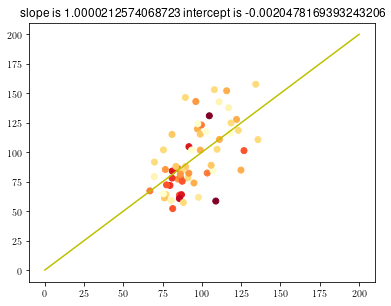

In [7]:
############ D's directly determined from non-lineair regression of model on measured values ###########
def residuals(D,f,rho,MOE):
    D1,D2,D3 = D
    err = f - (( (rho*MOE) / (D1*rho + D2*MOE) ) + D3)
    return err

bgreen = data.alpha[(data.Species=='Greenheart')]
x1green = data.rho12[(data.Species=='Greenheart')]
x2green = data.Edyn12[(data.Species=='Greenheart')]
ygreen = data.fm12[(data.Species=='Greenheart')]

D0 = [D1,D2,D3]
Dlsq = leastsq(residuals, D0, args=(ygreen,x1green,x2green))
D1,D2,D3 = Dlsq[0]
print ("D1 = ",D1, "D2 = ", D2, "D3 = ", D3)

xgreen = famod(x1green,x2green,D1,D2,D3)
slopegreen, interceptgreen, r_valuegreen, p_value, std_err = linregress(xgreen,ygreen)
print ("r^2 = ",r_valuegreen**2)
reeks = np.linspace(0,200,100)

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_axes([0.05,0.05,0.4,0.9])
ax1.set_title("slope is "+str(slopegreen)+"  intercept is "+str(interceptgreen))
s1 = ax1.scatter(xgreen,ygreen,c=bgreen,cmap='YlOrRd',edgecolor='face')
s2 = ax1.plot(reeks,reeks*slopegreen+interceptgreen,'y')

plt.show()